In [1]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 1.2*np.max(tess_2020bpi['flux'].rolling(24).median())

# tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
# tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)
# tess_2020bpi_s21_a_mcmc_norm = tess_2020bpi_s21_a_mcmc_norm.query('mjd_0 >1')

tess_2020bpi_fit = pd.read_csv('./fitPD/TESS/mod-dcRaw-cutoff-17-nparam-5-nwalk-50-nstep-21000earlyCut.csv')


##ZTF Data
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
#ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
# ztf_2020bpi['e_flux'] = [
#     np.mean(ast.literal_eval(flux))
#     for flux in ztf_2020bpi['e_flux'].to_numpy()]

compFluxRaw = pd.read_csv('CompanionEmission(Reformat).csv')
# display(compFlux)
# display(tess_2020bpi_norm)
tess_area = np.pi * 5.25**2
compFlux = pd.DataFrame()
compRads = ['f50','f25','f10','f5','f1','f0.5','f0.1']

compFlux['t-t0'] = compFluxRaw['time']

# rolling_flux_min = tess_2020bpi_s21_a_mcmc_norm['raw_flux'].rolling(24).median().min()
# tess_2020bpi_s21_a_mcmc_zero_norm = tess_2020bpi_s21_a_mcmc_norm[tess_2020bpi_s21_a_mcmc_norm.mjd_0 >0.5].copy()
# tess_2020bpi_s21_a_mcmc_zero_norm['raw_flux'] = (tess_2020bpi_s21_a_mcmc_norm['raw_flux'] + abs(rolling_flux_min) -0.1)
# tess_2020bpi_s21_a_mcmc_zero_norm['e_raw_flux'] = tess_2020bpi_s21_a_mcmc_norm['e_raw_flux']



for rad in compRads:
    compFlux[rad] = ((compFluxRaw[rad]/tess_area)*((100**2)/(174.2)**2))/(fluxNorm)
display(compFlux)
display(tess_2020bpi_fit)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


,t-t0,f50,f25,f10,f5,f1,f0.5,f0.1
0,0.001023,0.000213,0.000179,0.000142,0.000119,0.000079,0.000066,0.000043
1,0.022361,0.005069,0.004217,0.003294,0.002719,0.001730,0.001412,0.000859
2,0.043699,0.009947,0.008238,0.006386,0.005233,0.003256,0.002622,0.001528
3,0.065037,0.014774,0.012190,0.009394,0.007654,0.004679,0.003728,0.002099
4,0.086375,0.019541,0.016074,0.012323,0.009992,0.006014,0.004748,0.002595
...,...,...,...,...,...,...,...,...
763,16.281848,0.661120,0.355794,0.134512,0.055553,0.004117,0.000978,0.000013
764,16.303186,0.660984,0.355598,0.134363,0.055463,0.004104,0.000974,0.000013
765,16.324524,0.660847,0.355402,0.134214,0.055373,0.004091,0.000970,0.000013
766,16.345862,0.660710,0.355206,0.134066,0.055283,0.004078,0.000966,0.000013


,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_raw_flux,flux,e_flux,scale,shift,bkg_frac,mjd_0,modelFlux,modelResidual
0,1870.96488,58870.46488,-7424.3992,1223.1407,0.003404,0.121002,0.063611,-0.137528,0.157580,0.825751,0.036886,1.311607,0.52080,-0.004876,0.125878
1,1870.98571,58870.48571,-8717.5175,1146.6403,0.003404,0.053752,0.059632,-0.304123,0.147724,0.825751,0.036886,1.311607,0.54163,-0.004876,0.058628
2,1871.00655,58870.50655,-8900.9508,1186.4059,0.003404,0.044212,0.061700,-0.327755,0.152847,0.825751,0.036886,1.311607,0.56247,-0.004876,0.049088
3,1871.02738,58870.52738,-7685.3109,1173.8512,0.003404,0.107433,0.061047,-0.171142,0.151230,0.825751,0.036886,1.311607,0.58330,-0.004876,0.112309
4,1871.04821,58870.54821,-8359.4403,1190.6748,0.002610,0.072374,0.061922,-0.231666,0.153397,0.825751,0.036886,1.311607,0.60413,-0.004876,0.077250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,1897.67205,58897.17205,9985.5409,1085.6790,0.010174,1.026423,0.056462,1.881137,0.139870,0.825751,0.036886,1.311607,27.22797,3.144279,-2.117856
1233,1897.69288,58897.19288,12474.4539,1076.9029,0.010174,1.155862,0.056005,2.201789,0.138740,0.825751,0.036886,1.311607,27.24880,3.149797,-1.993935
1234,1897.71372,58897.21372,13437.6431,1074.2548,0.010247,1.205953,0.055868,2.323453,0.138398,0.825751,0.036886,1.311607,27.26964,3.155322,-1.949368
1235,1897.73455,58897.23455,7001.0698,1082.1323,0.010174,0.871213,0.056277,1.496642,0.139413,0.825751,0.036886,1.311607,27.29047,3.160848,-2.289635


<IPython.core.display.Javascript object>


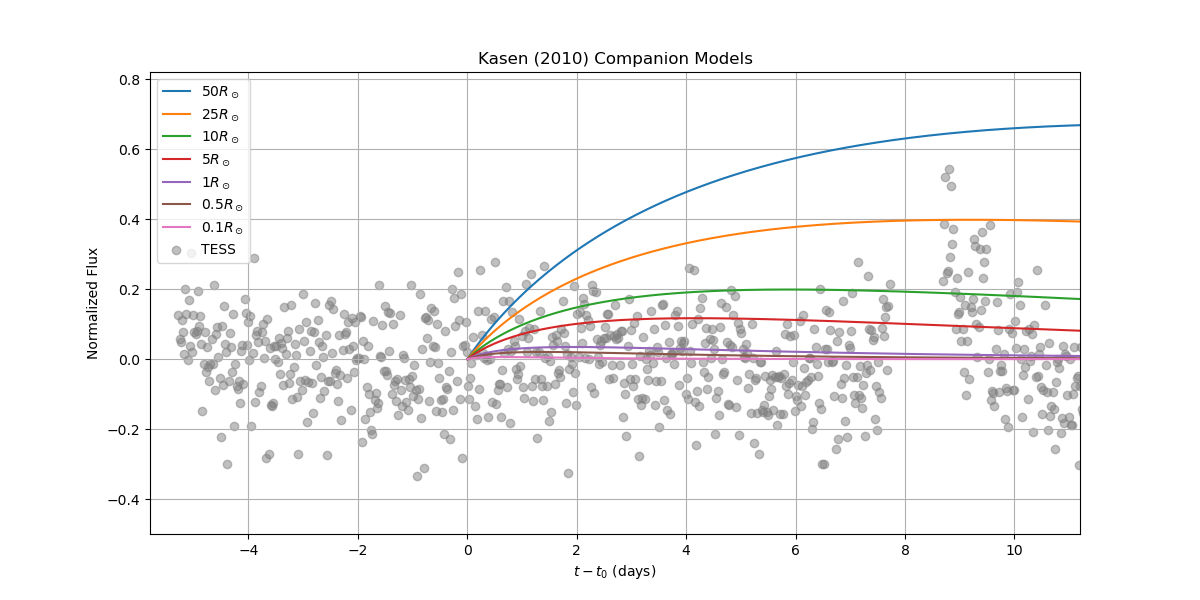

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
compFlux.plot('t-t0','f50',label=r'$50 R_\odot$',ax=ax)
compFlux.plot('t-t0','f25',ax=ax,label=r'$25 R_\odot$')
compFlux.plot('t-t0','f10',ax=ax,label=r'$10 R_\odot$')
compFlux.plot('t-t0','f5',ax=ax,label=r'$5 R_\odot$')
compFlux.plot('t-t0','f1',ax=ax,label=r'$1 R_\odot$')
compFlux.plot('t-t0','f0.5',ax=ax,label=r'$0.5 R_\odot$')
compFlux.plot('t-t0','f0.1',ax=ax,label=r'$0.1 R_\odot$')
ax.set_xlabel(r'$t-t_0$ (days)')
ax.set_ylabel('Normalized Flux')
ax.set_title('Kasen (2010) Companion Models');
ax.grid();
ax.scatter(tess_2020bpi_fit.mjd_0-5.8, tess_2020bpi_fit.modelResidual, ls='None',color='grey',alpha=0.5,label='TESS')
ax.legend()
ax.set_xlim(left=-5.8,right=17-5.8);
ax.set_ylim(bottom=-0.5);
#fig.savefig('./plots/(FIXED H_0) (Roughish) Companion Models and TESS Residuals.png')

<IPython.core.display.Javascript object>


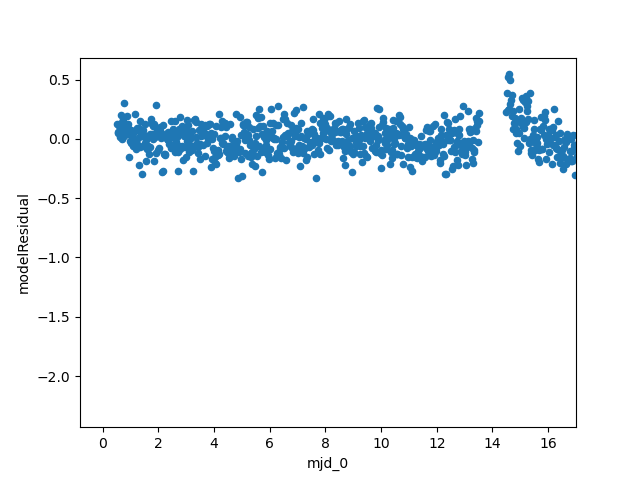

(-0.8187249999416963, 17.0)

In [29]:
ax = tess_2020bpi_fit.plot('mjd_0','modelResidual', kind='scatter')
ax.set_xlim(right=17)

In [34]:
np.polyfit(compFlux['t-t0'],compFlux['f50'],1/2)

array([0.20411079])